**Input**

In [1]:
data = [
        ['T1',['M','O','N','K','E','Y']],
        ['T2',['D','O','N','K','E','Y']],
        ['T3',['M','A','K','E']],
        ['T4',['M','U','C','K','Y']],
        ['T5',['C','O','O','K','I','E']]
        ]

init = []
for i in data:
    for q in i[1]:
        if(q not in init):
            init.append(q)
init = sorted(init)

print(init)

['A', 'C', 'D', 'E', 'I', 'K', 'M', 'N', 'O', 'U', 'Y']


**Support**

In [2]:
sp = 0.6
s = sp * len(data)
s

3.0

**Algorithm code**

In [3]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
c = Counter()

for i in init:
    for d in data:
        if(i in d[1]):
            c[i]+=1
print("C1:")
for i in c:
    print(str([i])+": "+str(c[i]))

print()

l = Counter()
for i in c:
    if(c[i] >= s):
        l[frozenset([i])]+=c[i]
print("L1:")
for i in l:
    print(str(list(i))+": "+str(l[i]))

def visualize_counts(counter, title):
    """Visualizes a Counter as a bar chart."""
    items = ['-'.join(list(key)) if isinstance(key, frozenset) else key for key in counter.keys()]
    counts = list(counter.values())
    
    plt.bar(items, counts, color='skyblue')
    plt.title(title)
    plt.xlabel("Itemsets")
    plt.ylabel("Counts")
    plt.xticks(rotation=0, ha="right")
    plt.show()


C1:
['A']: 1
['C']: 2
['D']: 1
['E']: 4
['I']: 1
['K']: 5
['M']: 3
['N']: 2
['O']: 3
['U']: 1
['Y']: 3

L1:
['E']: 4
['K']: 5
['M']: 3
['O']: 3
['Y']: 3


C1:
['A']: 1
['C']: 2
['D']: 1
['E']: 4
['I']: 1
['K']: 5
['M']: 3
['N']: 2
['O']: 3
['U']: 1
['Y']: 3



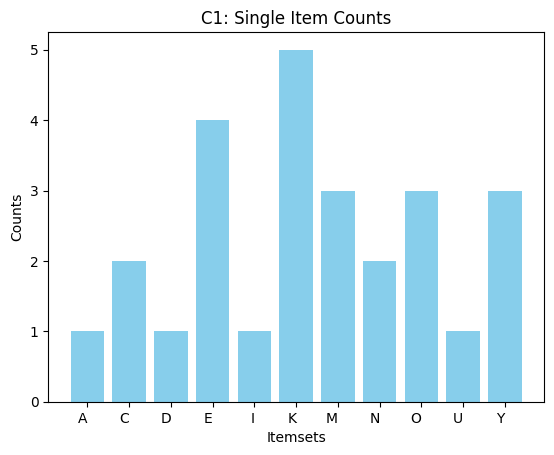

In [4]:
c = Counter()

for i in init:
    for d in data:
        if i in d[1]:
            c[i] += 1

print("C1:")
for i in c:
    print(str([i]) + ": " + str(c[i]))
print()

# Visualize C1
visualize_counts(c, "C1: Single Item Counts")


L1:
['E']: 4
['K']: 5
['M']: 3
['O']: 3
['Y']: 3



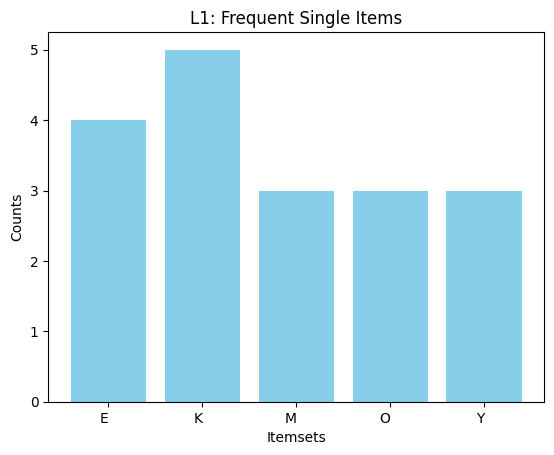

In [5]:
l = Counter()
for i in c:
    if c[i] >= s:
        l[frozenset([i])] += c[i]

print("L1:")
for i in l:
    print(str(list(i)) + ": " + str(l[i]))
print()

# Visualize L1
visualize_counts(l, "L1: Frequent Single Items")


C2:
['O', 'E']: 3
['K', 'E']: 4
['K', 'Y']: 3
['Y', 'O']: 2
['O', 'M']: 1
['K', 'M']: 3
['Y', 'E']: 2
['K', 'O']: 3
['M', 'E']: 2
['Y', 'M']: 2



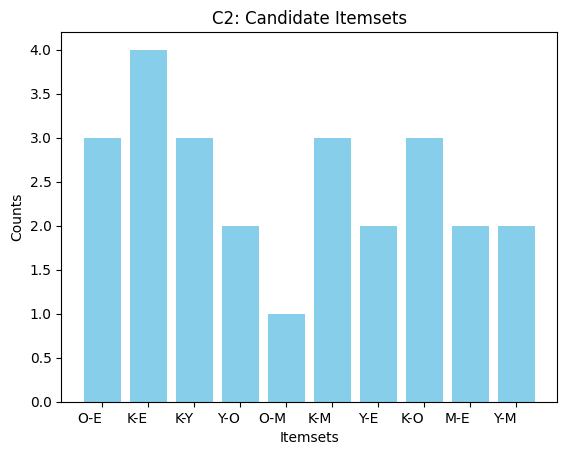

L2:
['O', 'E']: 3
['K', 'E']: 4
['K', 'Y']: 3
['K', 'M']: 3
['K', 'O']: 3



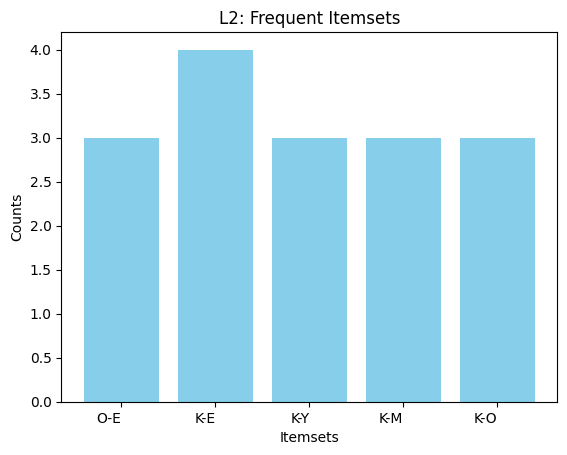

C3:
['K', 'M', 'E']: 2
['K', 'Y', 'M']: 2
['K', 'O', 'E']: 3
['K', 'Y', 'O']: 2
['K', 'Y', 'E']: 2
['K', 'O', 'M']: 1



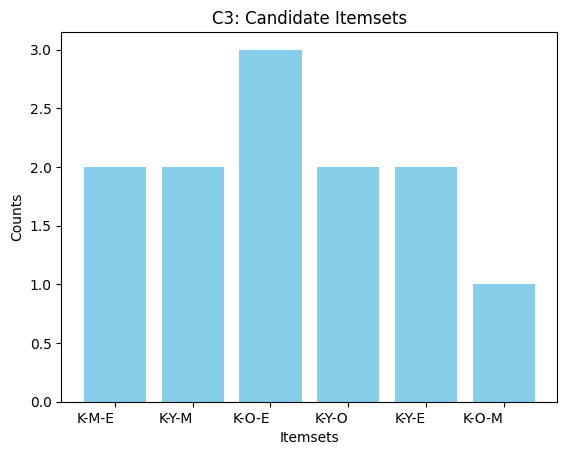

L3:
['K', 'O', 'E']: 3



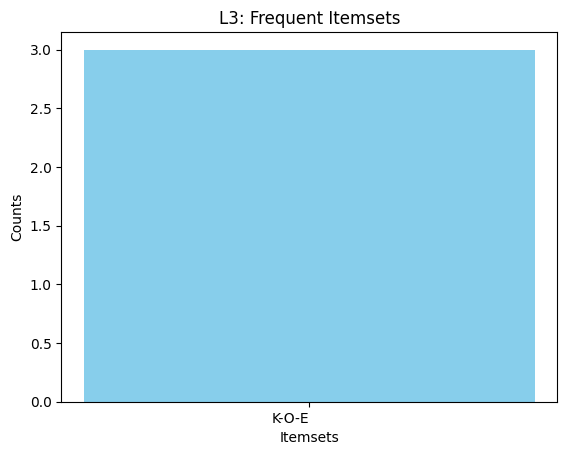

C4:



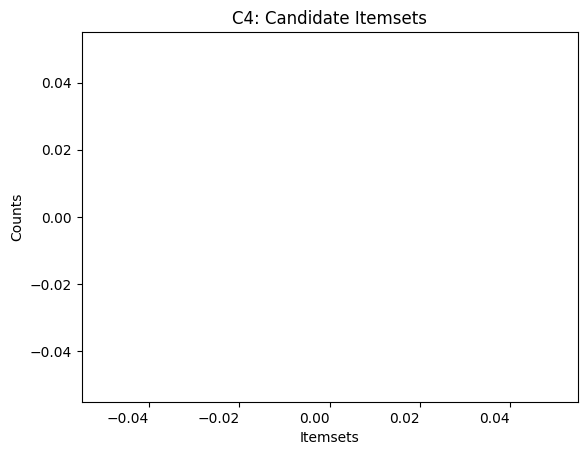

L4:



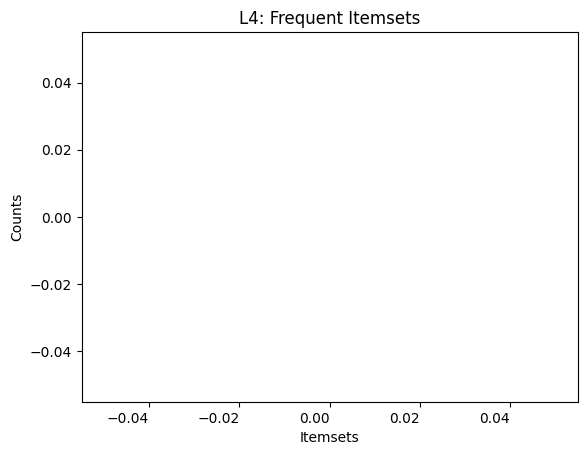

In [6]:
pl = l  
pos = 1  

for count in range(2, 1000):
    
    nc = set()
    temp = list(l)
    for i in range(0, len(temp)):
        for j in range(i + 1, len(temp)):
            t = temp[i].union(temp[j])
            if len(t) == count:
                nc.add(t)

    nc = list(nc)
    
    
    c = Counter()
    for i in nc:
        c[i] = 0
        for q in data:
            temp = set(q[1])
            if i.issubset(temp):
                c[i] += 1

    print(f"C{count}:")
    for i in c:
        print(str(list(i)) + ": " + str(c[i]))
    print()

    
    visualize_counts(c, f"C{count}: Candidate Itemsets")

    
    l = Counter()
    for i in c:
        if c[i] >= s:
            l[i] += c[i]

    print(f"L{count}:")
    for i in l:
        print(str(list(i)) + ": " + str(l[i]))
    print()

    
    visualize_counts(l, f"L{count}: Frequent Itemsets")


    if len(l) == 0:
        break

    pl = l  
    pos = count 

Result:
L3:
['K', 'O', 'E']: 3



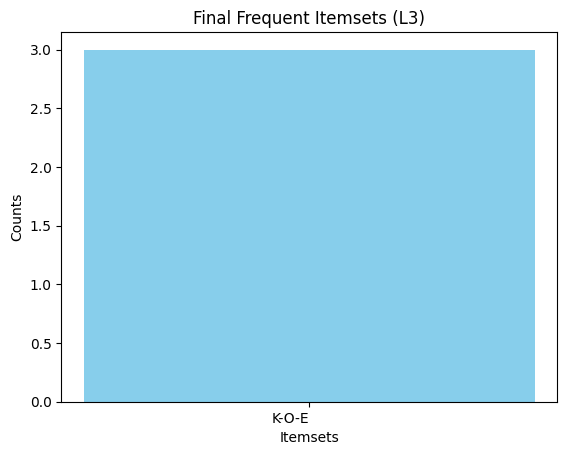

In [7]:
print("Result:")
print(f"L{pos}:")
for i in pl:
    print(str(list(i)) + ": " + str(pl[i]))
print()

visualize_counts(pl, f"Final Frequent Itemsets (L{pos})")